In [147]:
import sys
import pickle
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from scipy.stats import pearsonr

sys.path.insert(0, str(Path(".").resolve().parent.parent))
sys.path.insert(0, str(Path(".").resolve().parent.resolve()))

import utils, run_utils, experiments
from experiments import load_mixture_graph_closeness

DIR_DATA = Path('../..').resolve() / "data"

In [75]:
mixture_similarity = load_mixture_graph_closeness()

In [76]:
train = utils.load_train()
leaderboard = utils.load_validation()

leaderboard_targets = pd.read_csv(DIR_DATA / "leaderboard_targets.csv")
leaderboard['distance'] = leaderboard_targets["Experimental_value"]

test = utils.load_test()

In [77]:
display(train)
display(leaderboard)

,Dataset,mixture1,mixture2,distance
0,Snitz 1,Snitz 1/001,Snitz 1/002,0.604167
1,Snitz 1,Snitz 1/001,Snitz 1/003,0.651042
2,Snitz 1,Snitz 1/001,Snitz 1/005,0.505208
3,Snitz 1,Snitz 1/001,Snitz 1/006,0.411458
4,Snitz 1,Snitz 1/001,Snitz 1/007,0.5625
...,...,...,...,...
495,Bushdid,Bushdid/509,Bushdid/510,0.461538
496,Bushdid,Bushdid/513,Bushdid/514,0.692308
497,Bushdid,Bushdid/515,Bushdid/516,0.730769
498,Bushdid,Bushdid/517,Bushdid/518,0.538462


,Dataset,Mixture_1,Mixture_2,Predicted_Experimental_Values,mixture1,mixture2,distance
0,Bushdid,65,66,0,Bushdid/065,Bushdid/066,0.653846
1,Snitz 2,1,8,0,Snitz 2/001,Snitz 2/008,0.640420
2,Snitz 1,24,17,0,Snitz 1/024,Snitz 1/017,0.745192
3,Snitz 2,12,14,0,Snitz 2/012,Snitz 2/014,0.608784
4,Snitz 1,49,45,0,Snitz 1/049,Snitz 1/045,0.676136
5,Snitz 1,20,16,0,Snitz 1/020,Snitz 1/016,0.754808
6,Snitz 1,47,39,0,Snitz 1/047,Snitz 1/039,0.562500
7,Bushdid,29,30,0,Bushdid/029,Bushdid/030,0.730769
8,Snitz 1,10,3,0,Snitz 1/010,Snitz 1/003,0.651042
9,Bushdid,135,136,0,Bushdid/135,Bushdid/136,0.538462


In [150]:
def plot_scatter_targets(mixture_similarity, train):
    y_hat_train = [mixture_similarity.loc[r.mixture1, r.mixture2] for _, r in train.iterrows()]
    plt.figure(figsize=(16, 9), dpi=200)
    sns.scatterplot(x=train.distance, y=y_hat_train, hue=train.Dataset)
    plt.title(f"Pearson: {pearsonr(train.distance, y_hat_train).statistic:.3f}, RMSE: {root_mean_squared_error(train.distance, y_hat_train):.3f}")

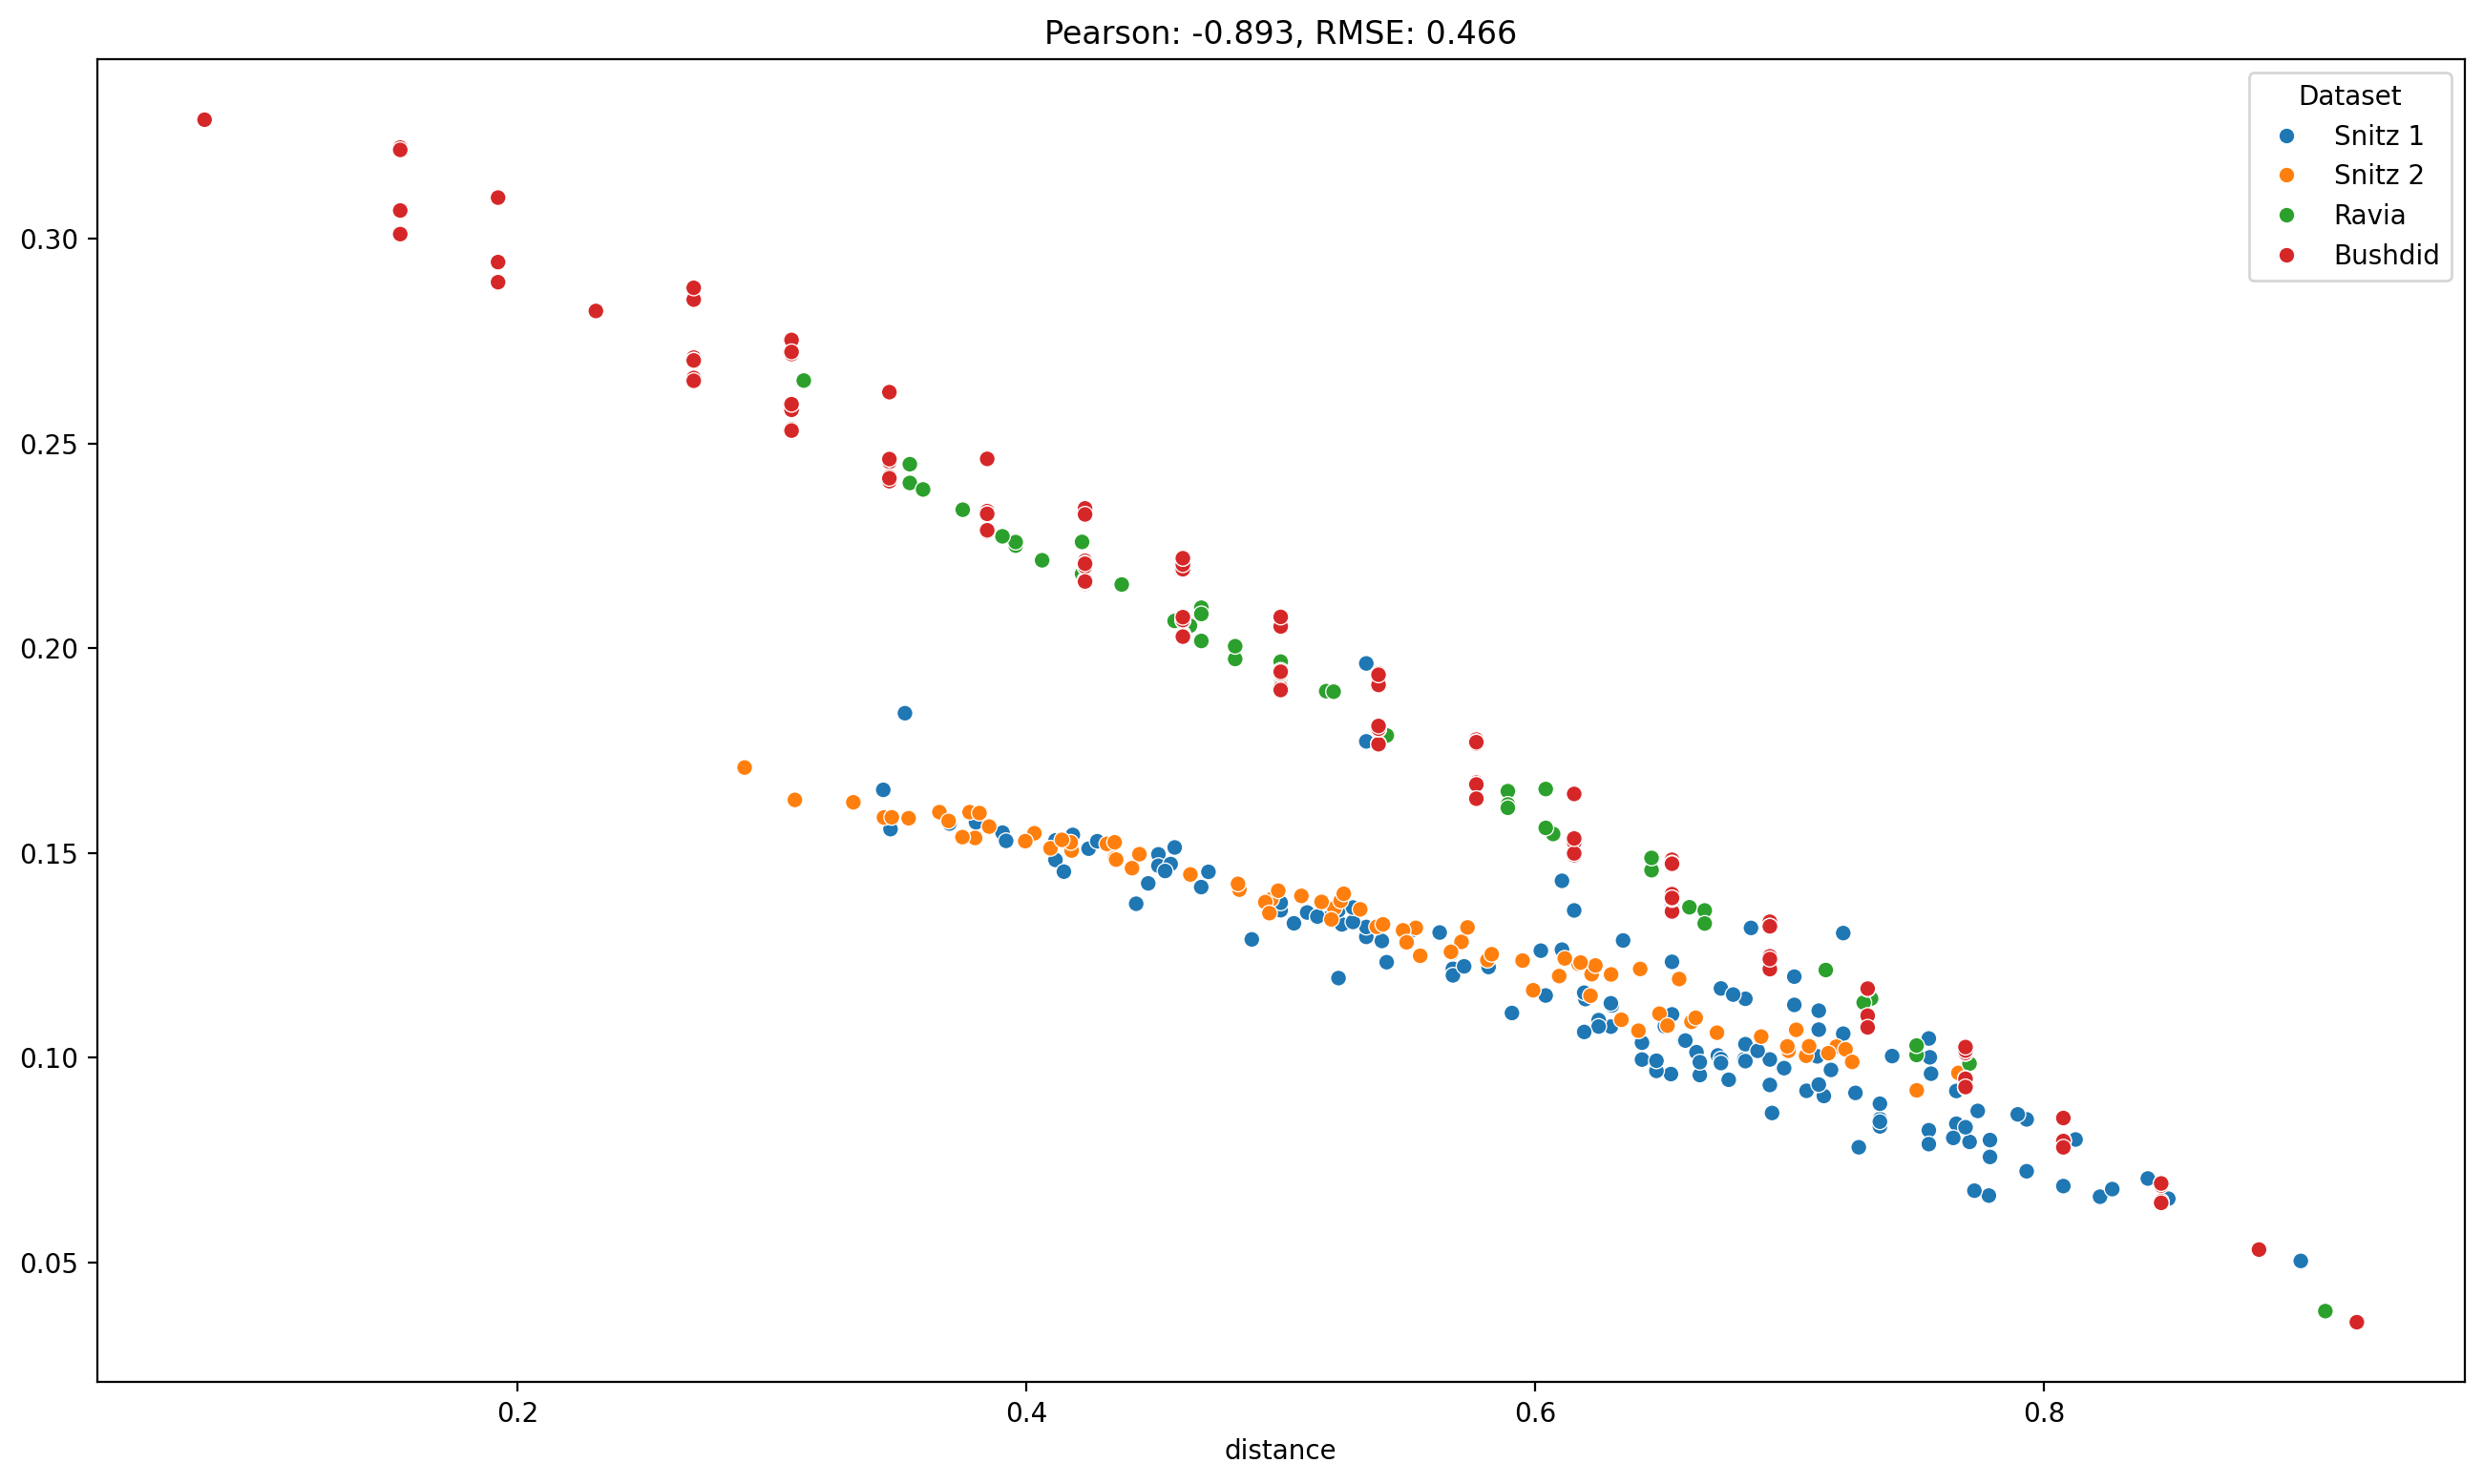

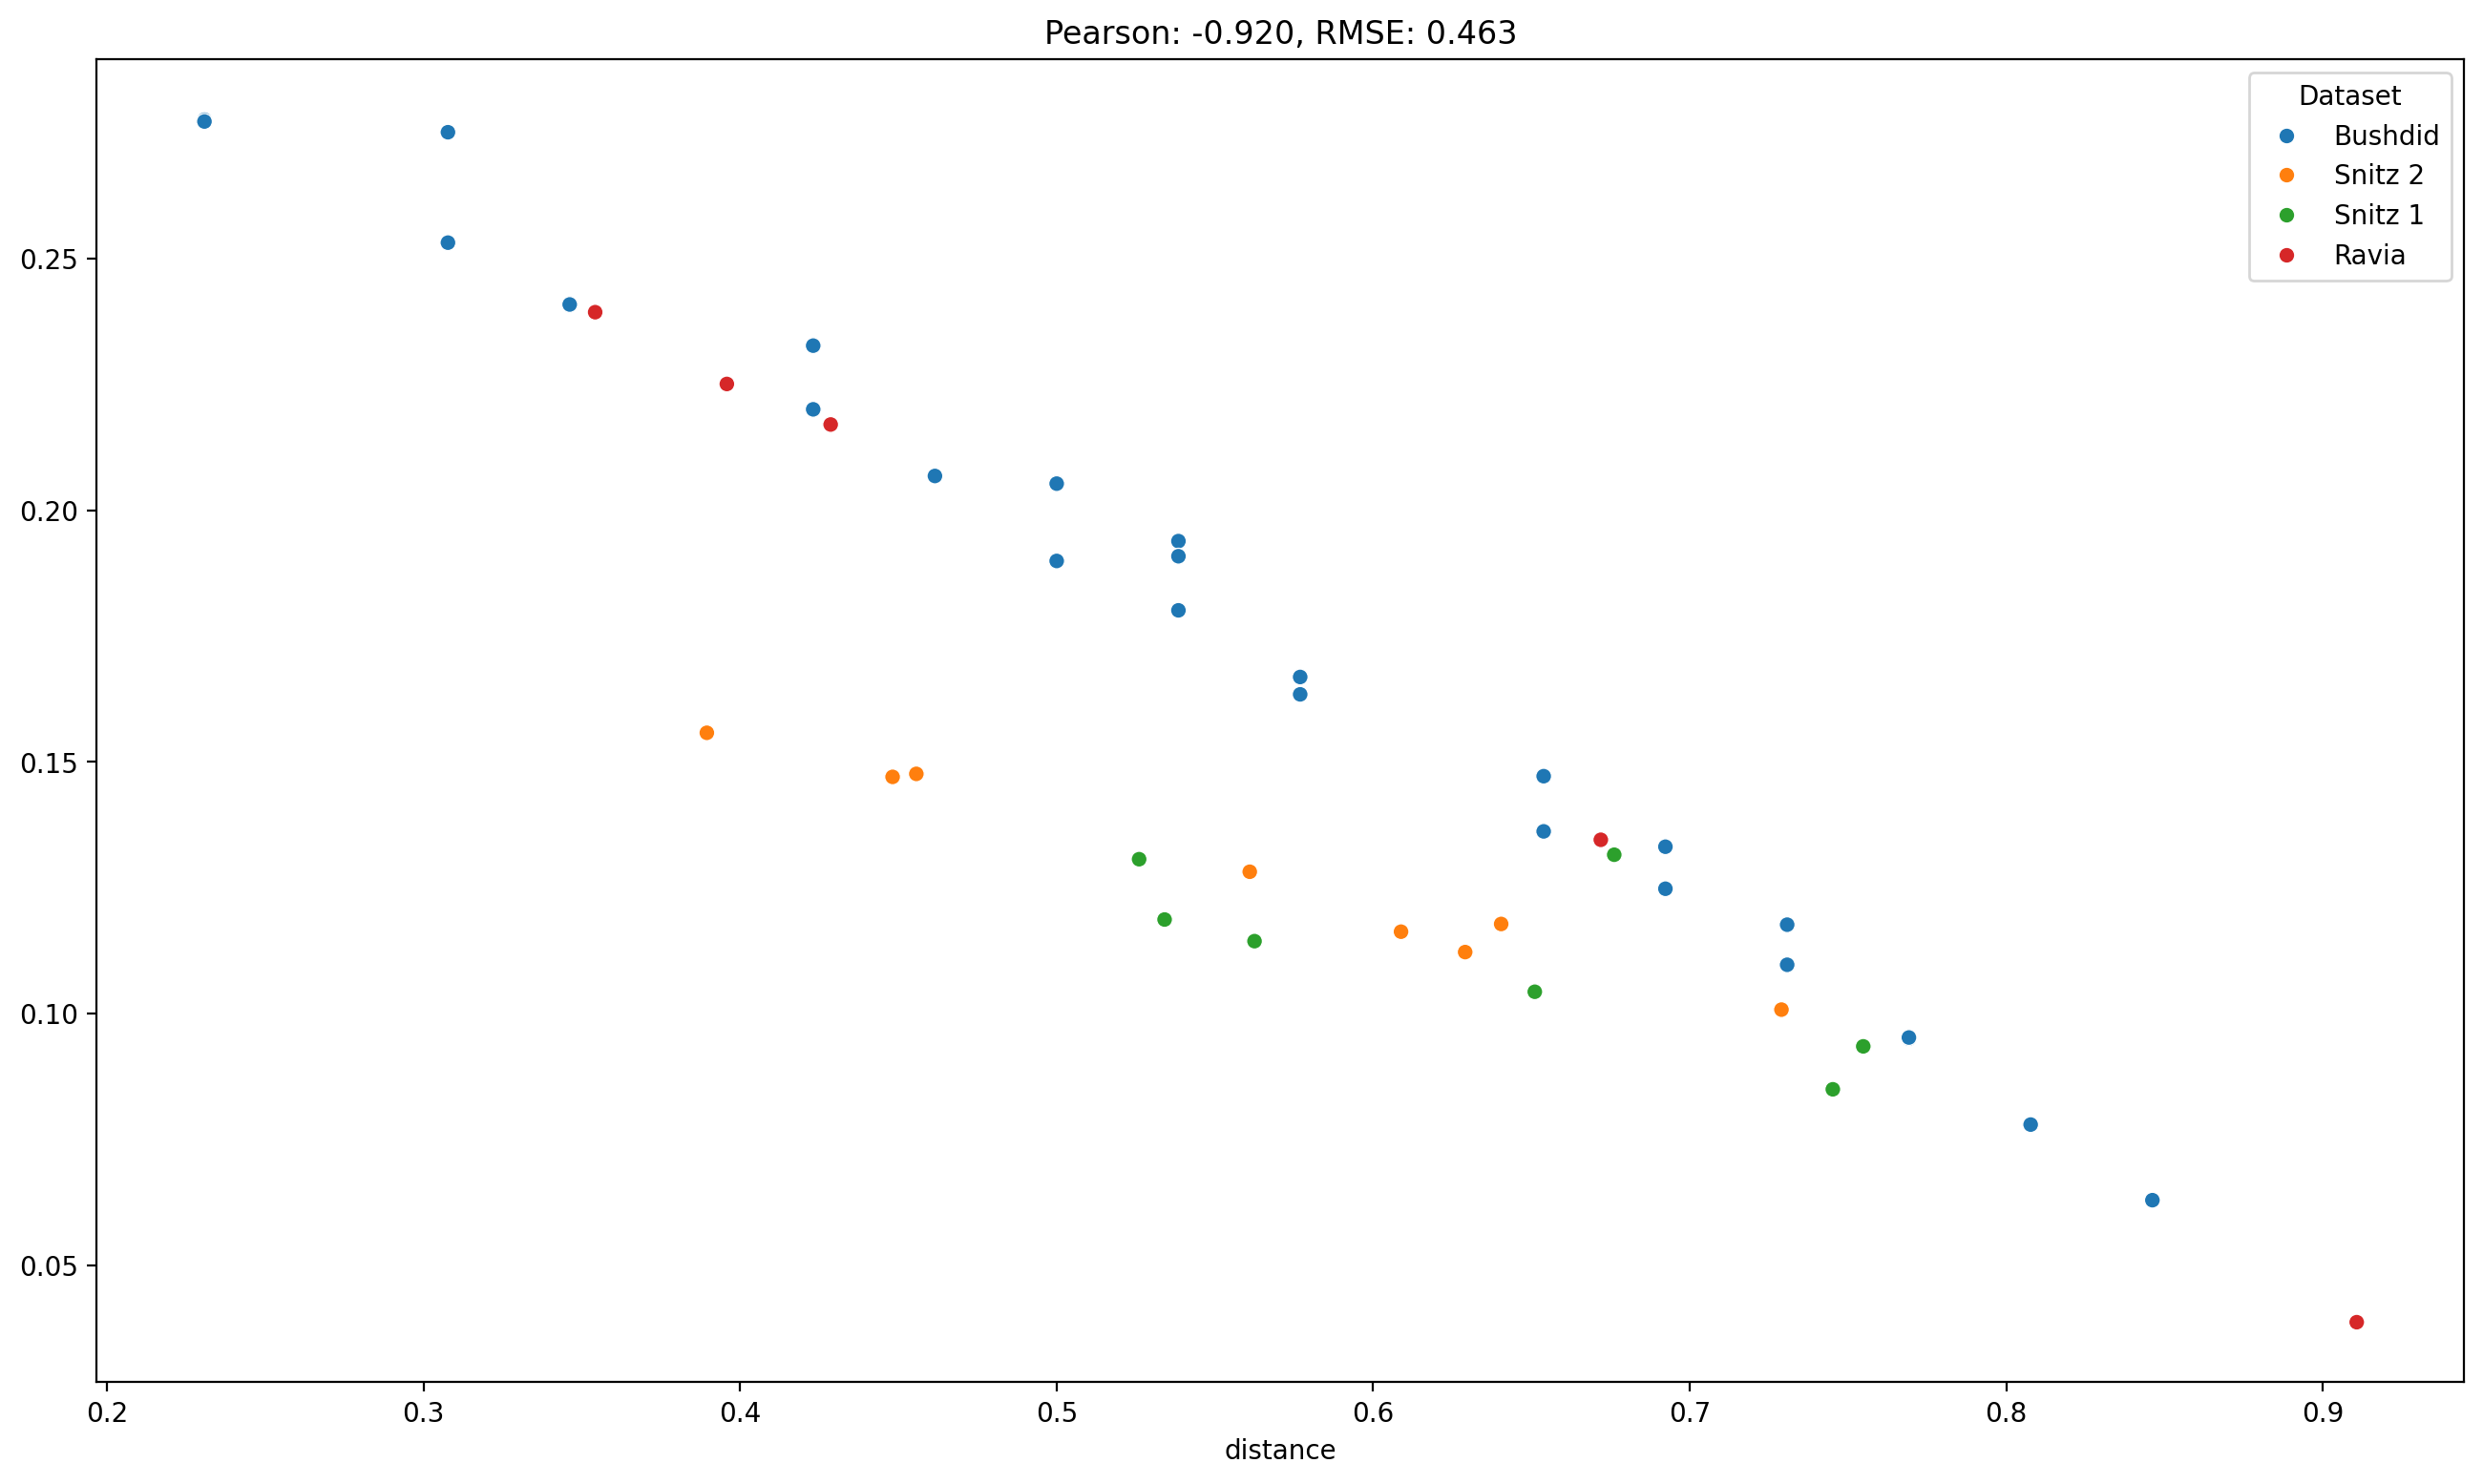

In [151]:
plot_scatter_targets(mixture_similarity, train)
plot_scatter_targets(mixture_similarity, leaderboard)

In [79]:
old_mixture_similarity = np.load(DIR_DATA / "graph_closeness.npy")
with open(DIR_DATA / "graph_mix_id_map.pickle", "rb") as f:
    mixture_similarity_index = pickle.load(f)
mixture_similarity_index = pd.Series(mixture_similarity_index).sort_values()
old_mixture_similarity = pd.DataFrame(
    old_mixture_similarity,
    index=mixture_similarity_index.index,
    columns=mixture_similarity_index.index,
)

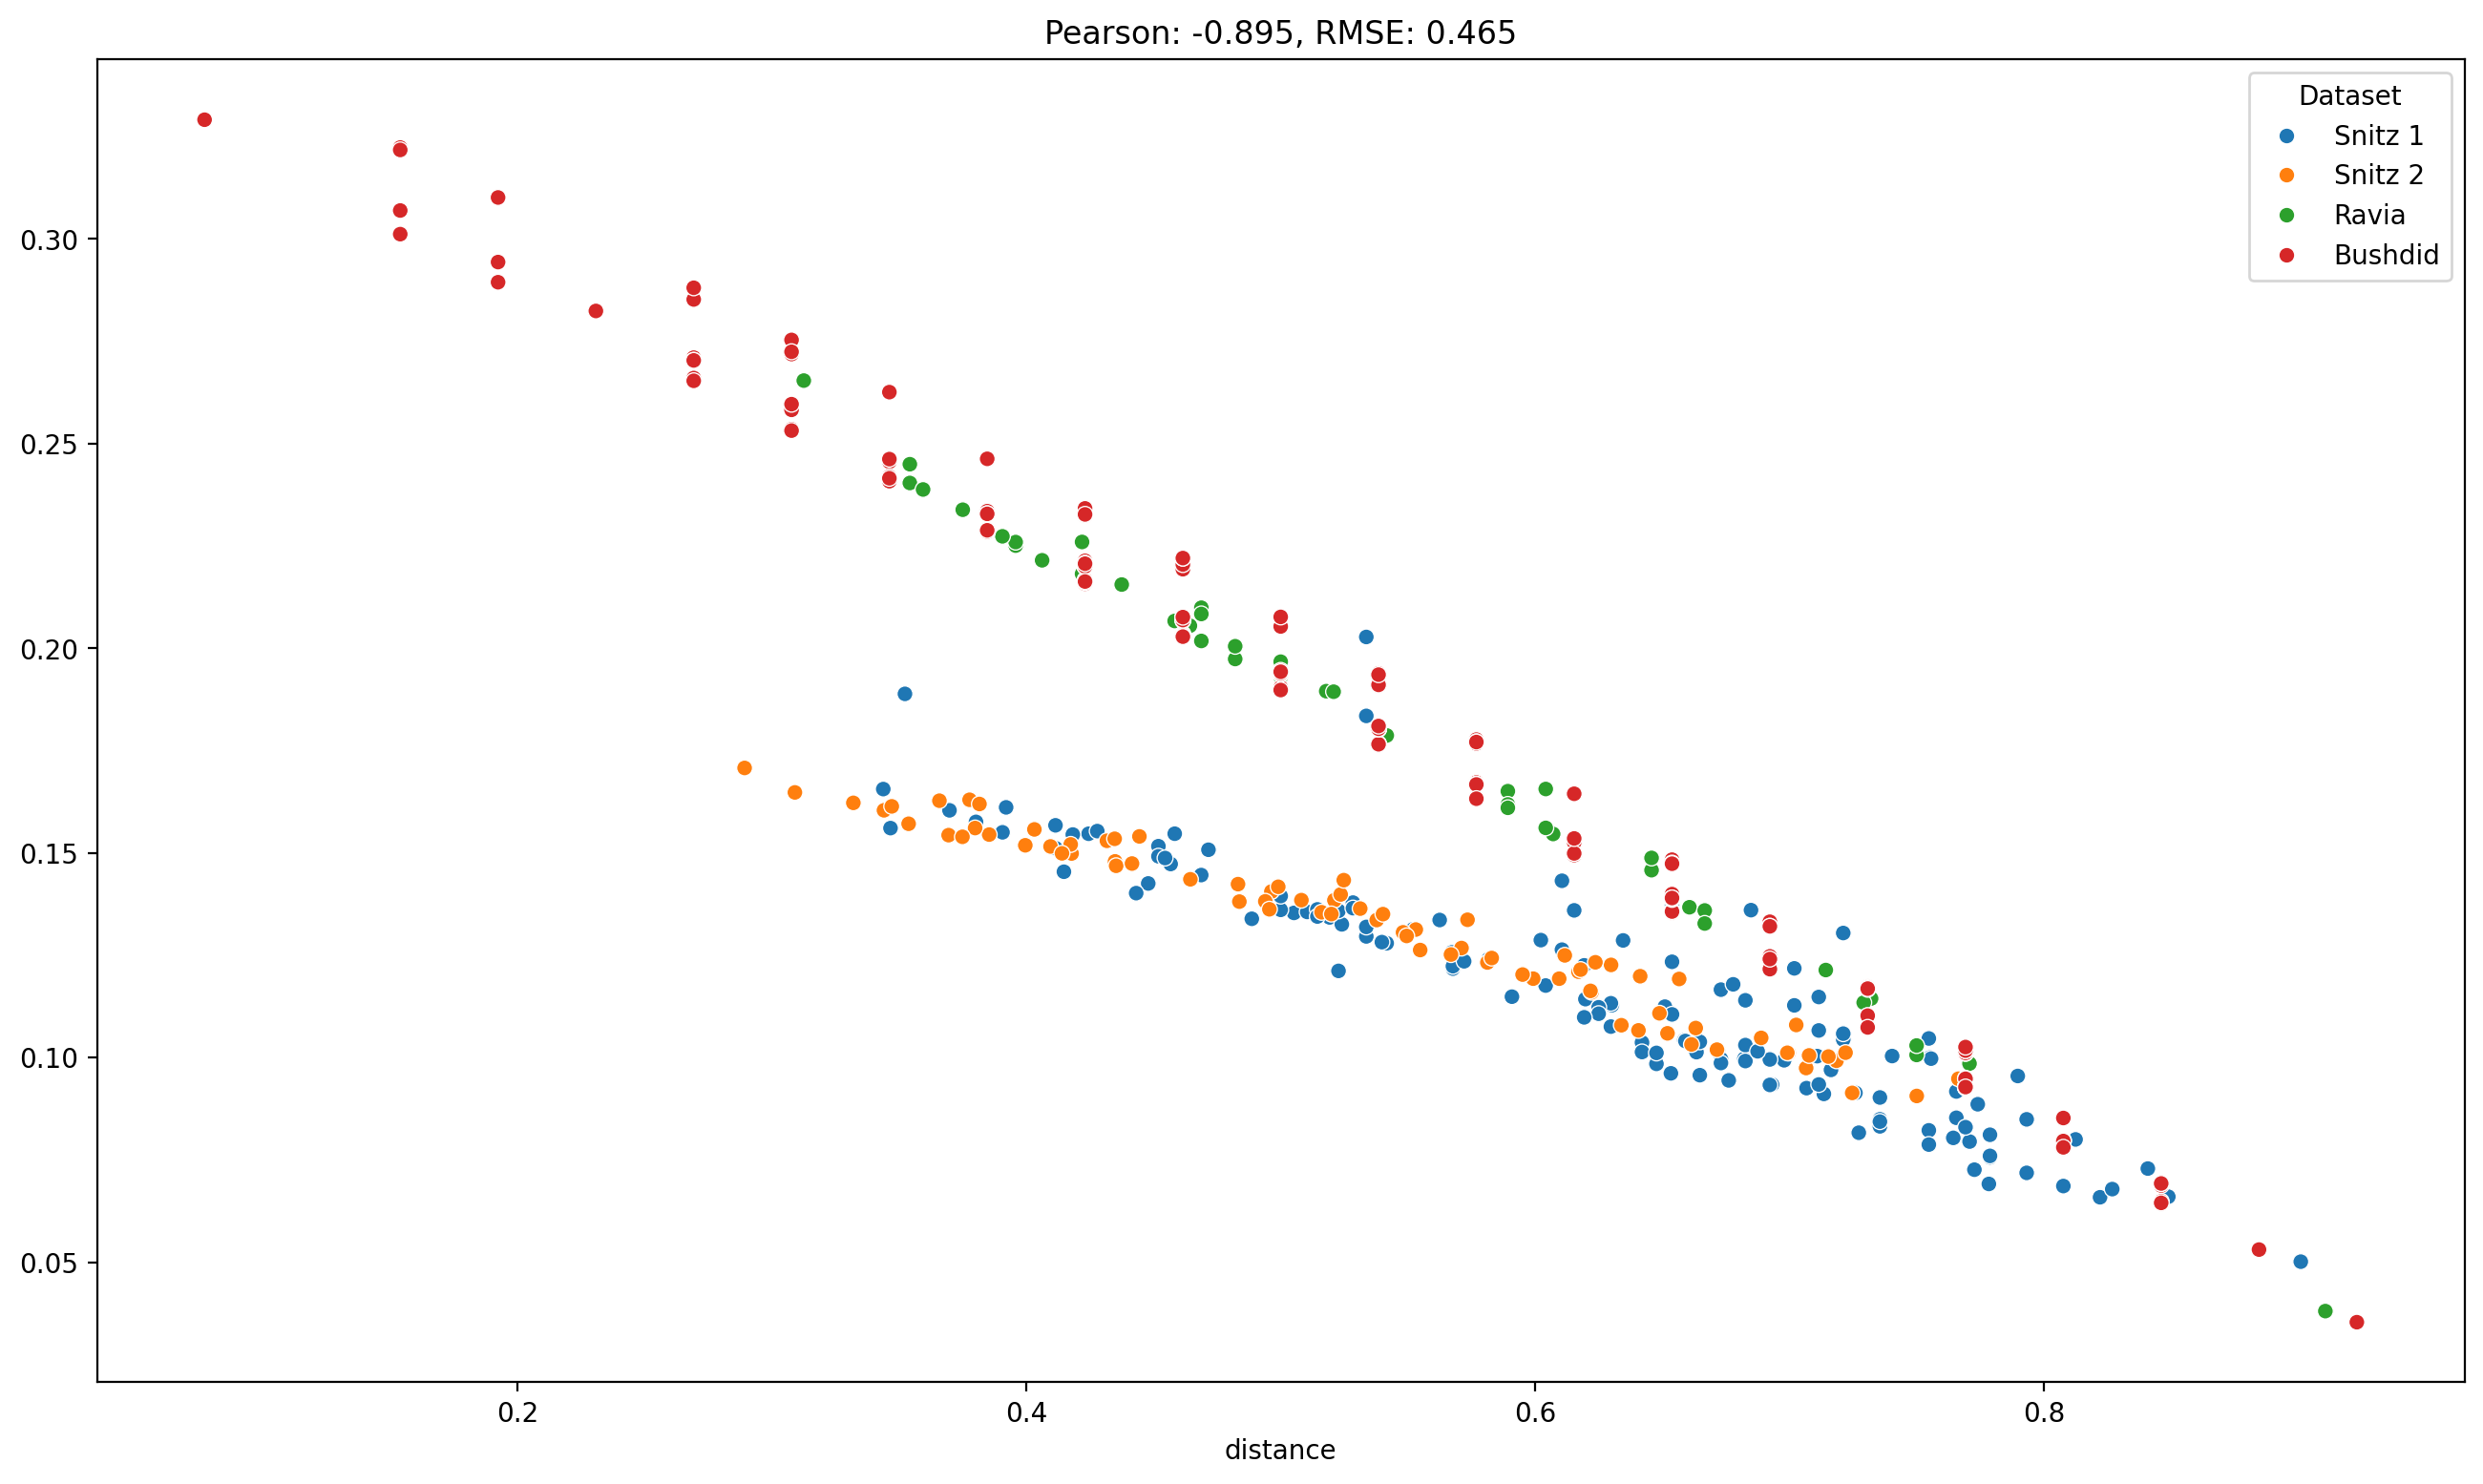

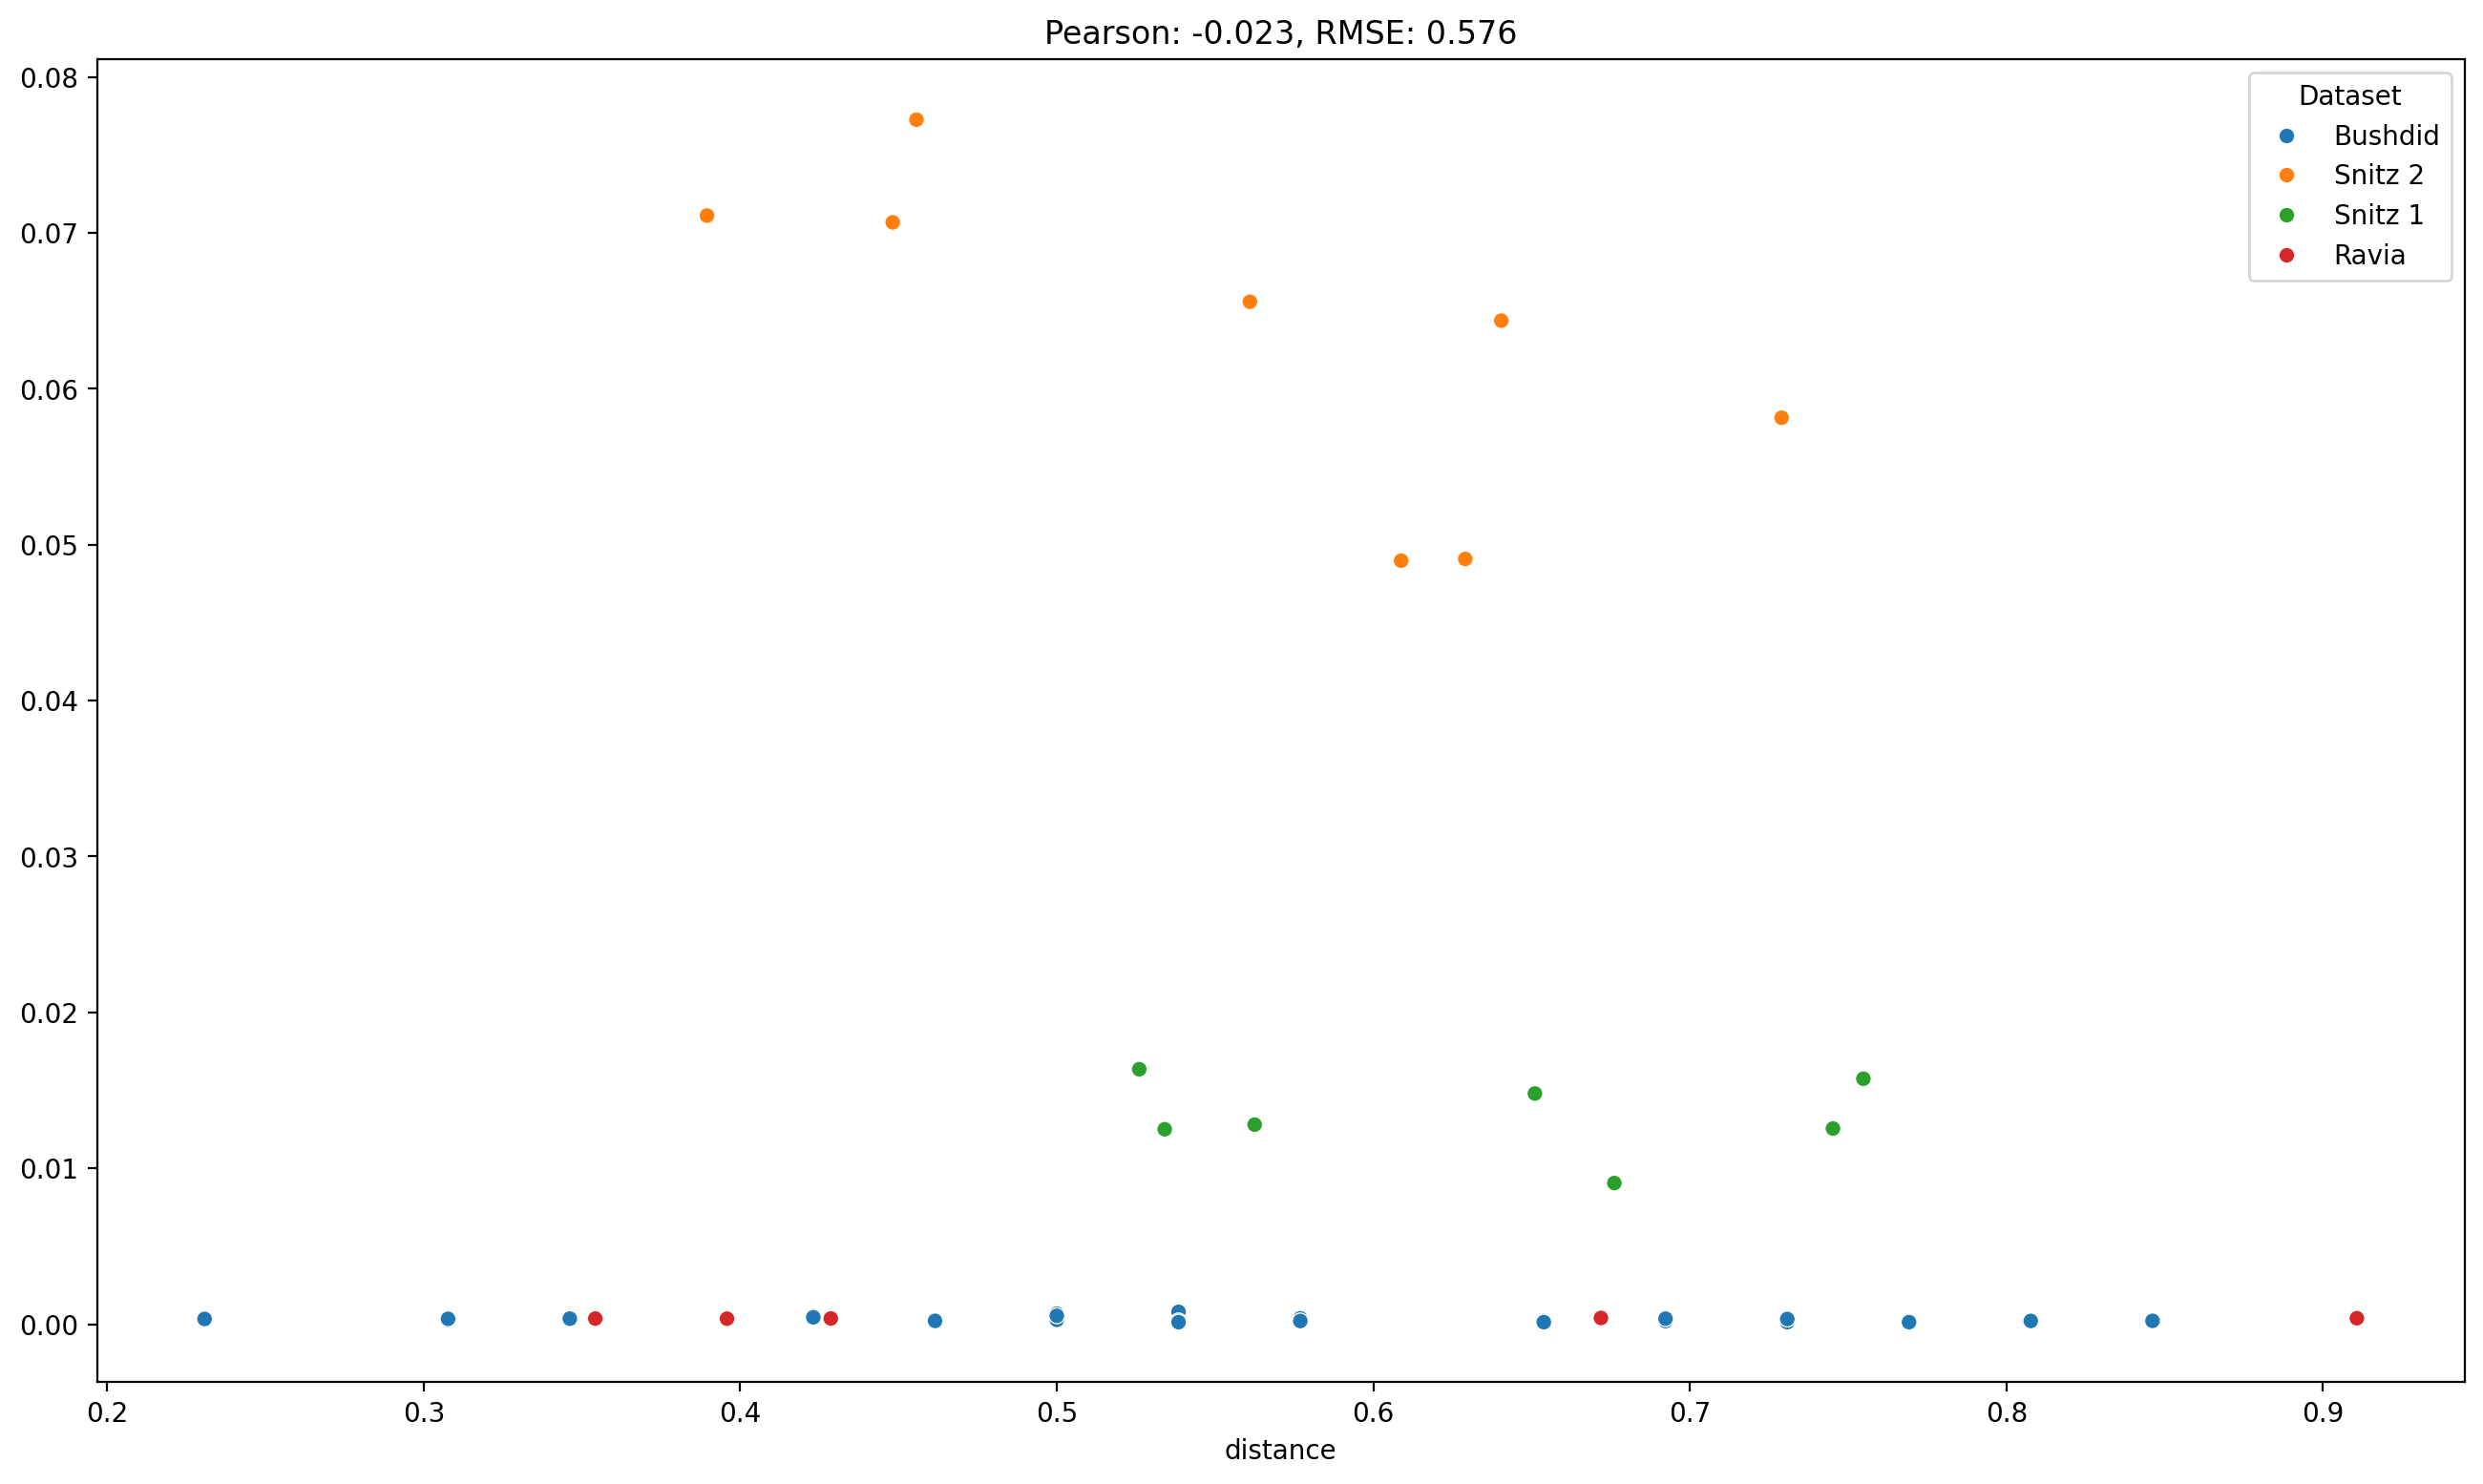

In [160]:
plot_scatter_targets(old_mixture_similarity, train)
plot_scatter_targets(old_mixture_similarity, leaderboard)

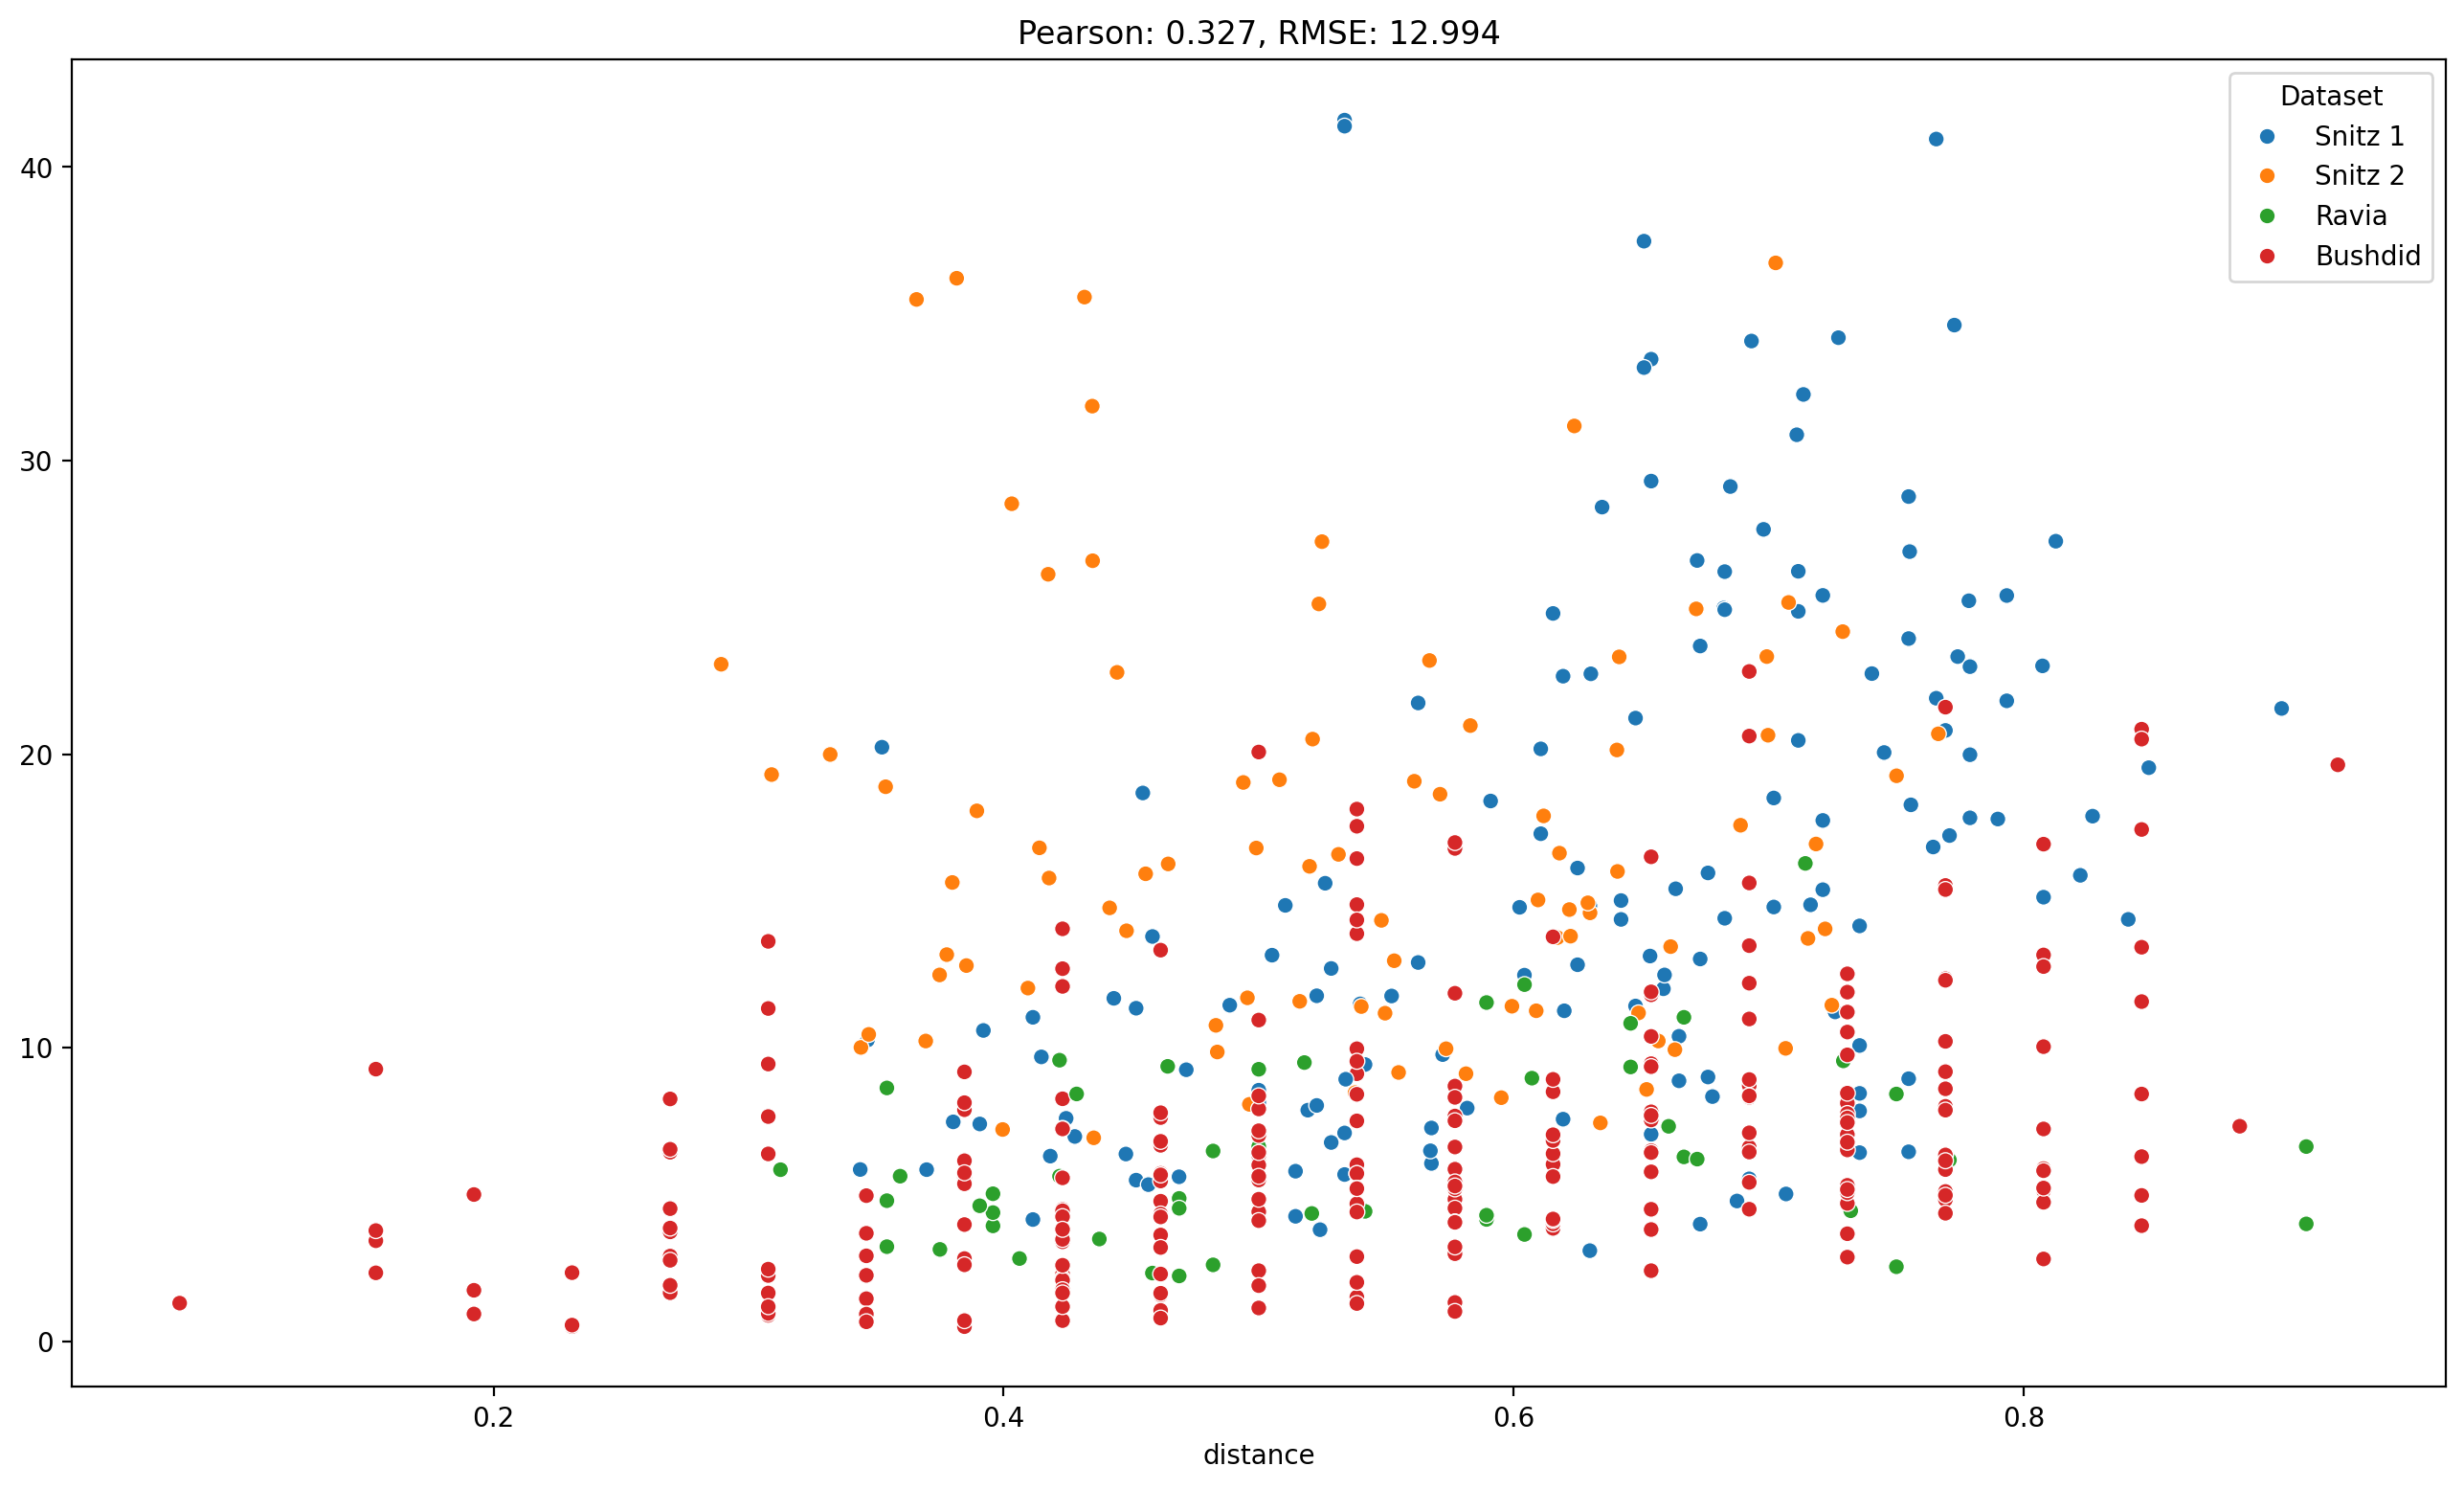

In [174]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, rbf_kernel, manhattan_distances

mixture_binary_composition = run_utils.get_mixture_binary_composition()
# mixture_binary_composition = mixture_binary_composition.drop(columns="Snitz 1/002")

molecule_smell = pd.read_csv(DIR_DATA / "perception_prediction_new.csv", index_col=0)
# molecule_smell = experiments.normalize(molecule_smell)
molecule_smell.index = molecule_smell.index.astype(str)

mixture_molecular_features = run_utils.generate_mixture_molecular_features(
    mixture_binary_composition,
    molecule_smell,
)

mix_smell_similarity = pd.DataFrame(
    # cosine_similarity(mixture_molecular_features),
    euclidean_distances(mixture_molecular_features),
    # rbf_kernel(mixture_molecular_features),
    index=mixture_binary_composition.index,
    columns=mixture_binary_composition.index,
)
plot_scatter_targets(mix_smell_similarity, pd.concat((train, leaderboard)))

In [164]:
def tanimoto_similarity(A):
    A = np.array(A)
    intersection = A @ A.T
    sum_A = A.sum(axis=1)
    return intersection / ((sum_A[:, None] + sum_A) - intersection)

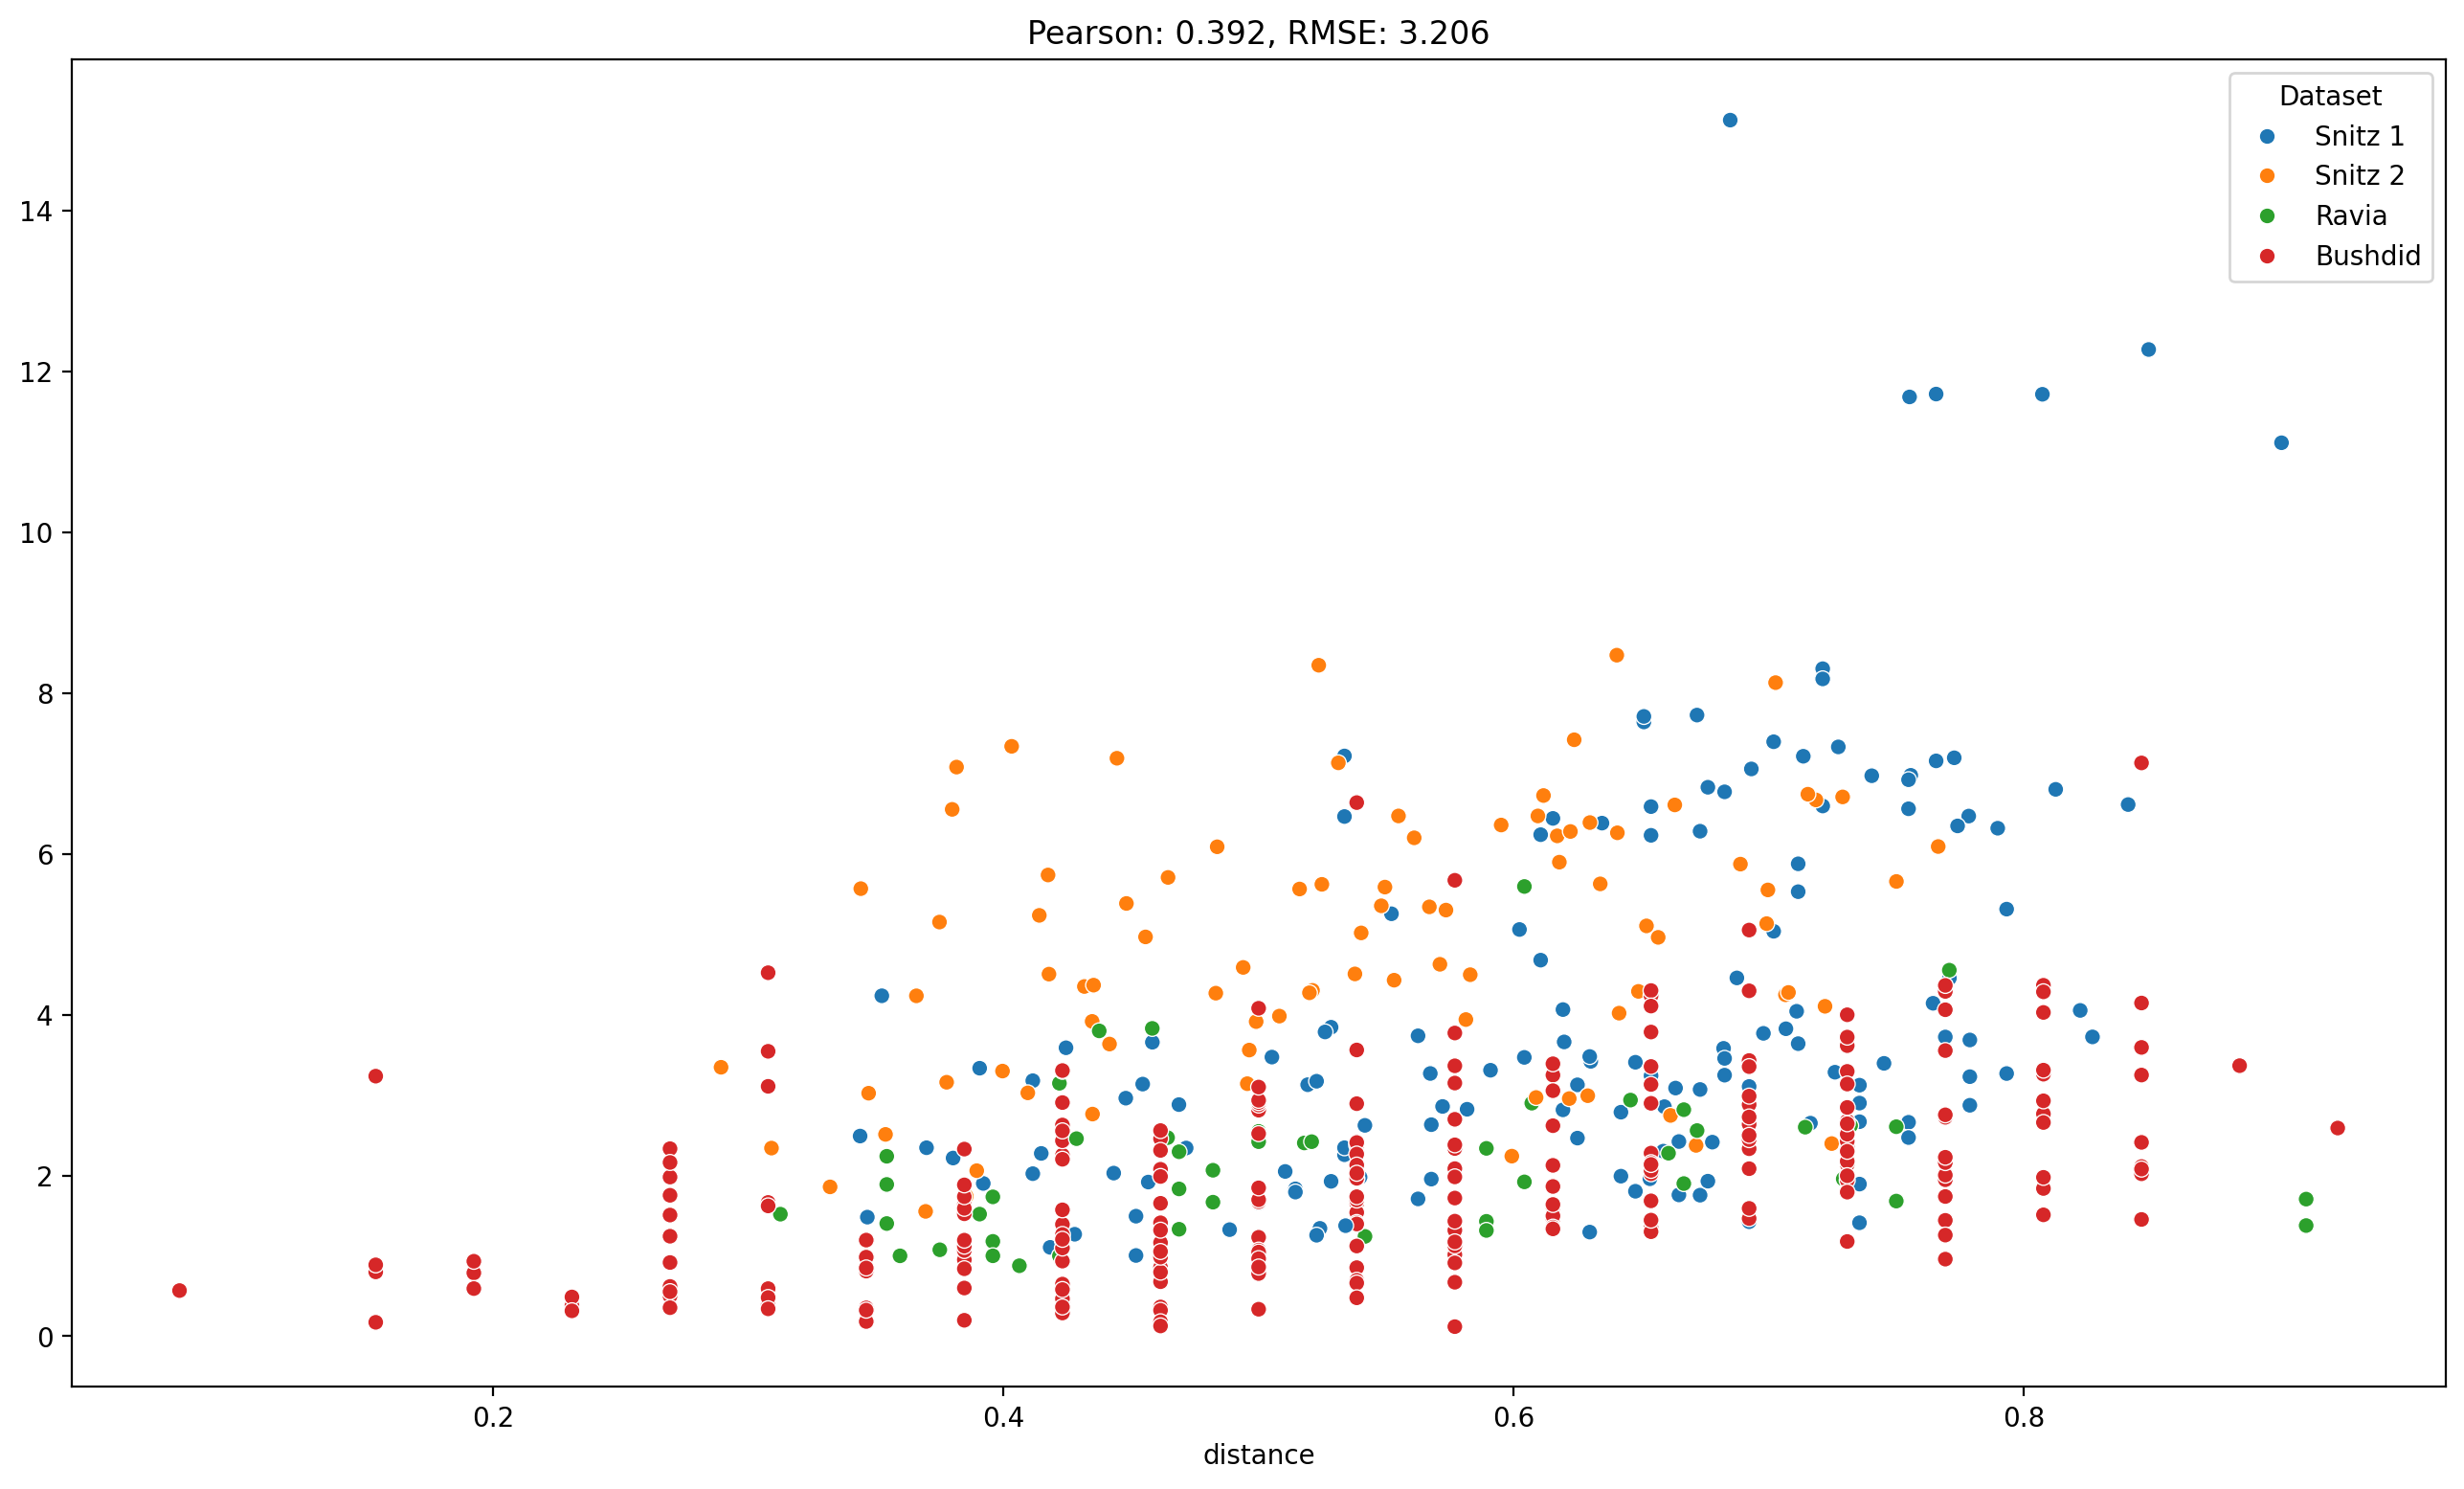

In [172]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, rbf_kernel, manhattan_distances

mixture_binary_composition = run_utils.get_mixture_binary_composition()
# mixture_binary_composition = mixture_binary_composition.drop(columns="Snitz 1/002")

# molecule_smell_emb = pd.read_csv(DIR_DATA / "chemprop_embeddings.csv", index_col=0)
# molecule_smell_emb = pd.read_csv(DIR_DATA / "Morgan_Fingerprint_radius2_fpSize2048.csv", index_col=0)
molecule_smell_emb = pd.read_csv(DIR_DATA / "embeddings_molecule.csv", index_col=0)
# molecule_smell_emb = experiments.normalize(molecule_smell_emb)
molecule_smell_emb.index = molecule_smell_emb.index.astype(str)

# molecule_smell_emb = pd.DataFrame(
#     tanimoto_similarity(molecule_smell_emb),
#     index=molecule_smell_emb.index,
#     columns=molecule_smell_emb.index,
# )

# FIXME
common_molecules = molecule_smell_emb.index.intersection(mixture_binary_composition.columns)

mixture_molecular_features = run_utils.generate_mixture_molecular_features(
    mixture_binary_composition.loc[:, common_molecules],
    molecule_smell_emb.loc[common_molecules],
)

mix_smell_similarity = pd.DataFrame(
    # cosine_similarity(mixture_molecular_features),
    euclidean_distances(mixture_molecular_features),
    # manhattan_distances(mixture_molecular_features),
    # rbf_kernel(mixture_molecular_features),
    # tanimoto_similarity(mixture_molecular_features),
    index=mixture_binary_composition.index,
    columns=mixture_binary_composition.index,
)
plot_scatter_targets(mix_smell_similarity, pd.concat((train, leaderboard)))